# Long-Short Term Memory (LSTM) and Gated Recurrent Unit (GRU)

Aim to address the shortcoming of memory loss in long sequences that occur in Recurrent Neural Networks (RNNs)

# 1. LSTM

Standard RNNs have poor memory, they tend to weaken the signal of th eearlier inputs as we start to get further down the sequence (Transition matrix necessarily weakens signals)


- We need some structure that will allow us to keep **some portions/dimensions unchanged** over many steps to maintain the information in the sequence

## LSTMs make Remembering Easy (are a special case of RNNs)

They define a more **complicated update mechanism** for the changing of the internal state (for definig the current state of our NN)


- by default **LSTMs remember the information from thhe last step**, the same as with RNNs



- On top of that, items are overwritten as an active choice, rather than keeping or adjusting past information as we have more flexibility in retaining or forgetting a large portion from those prior steps

- They add an **explicit memory unit** 

Which means to **augment RNNs with a few additional Gate units**:

- Gate Units control how long/if events will stay in memory (gates that allow for information to be passed along and how long we will continue to allow that to stay in memory)

- **1. Input Gates** the cell will have an input gate, which given a certain value will tell us to store that value in memory



- **2. Forget Gate:** which if given a certain value will tell whether that information will be removed from memory



- **3. Output Gate :** which is going to fire off the response to the hidden unit forward within our network

## Single Unrolled Cell

<div>
    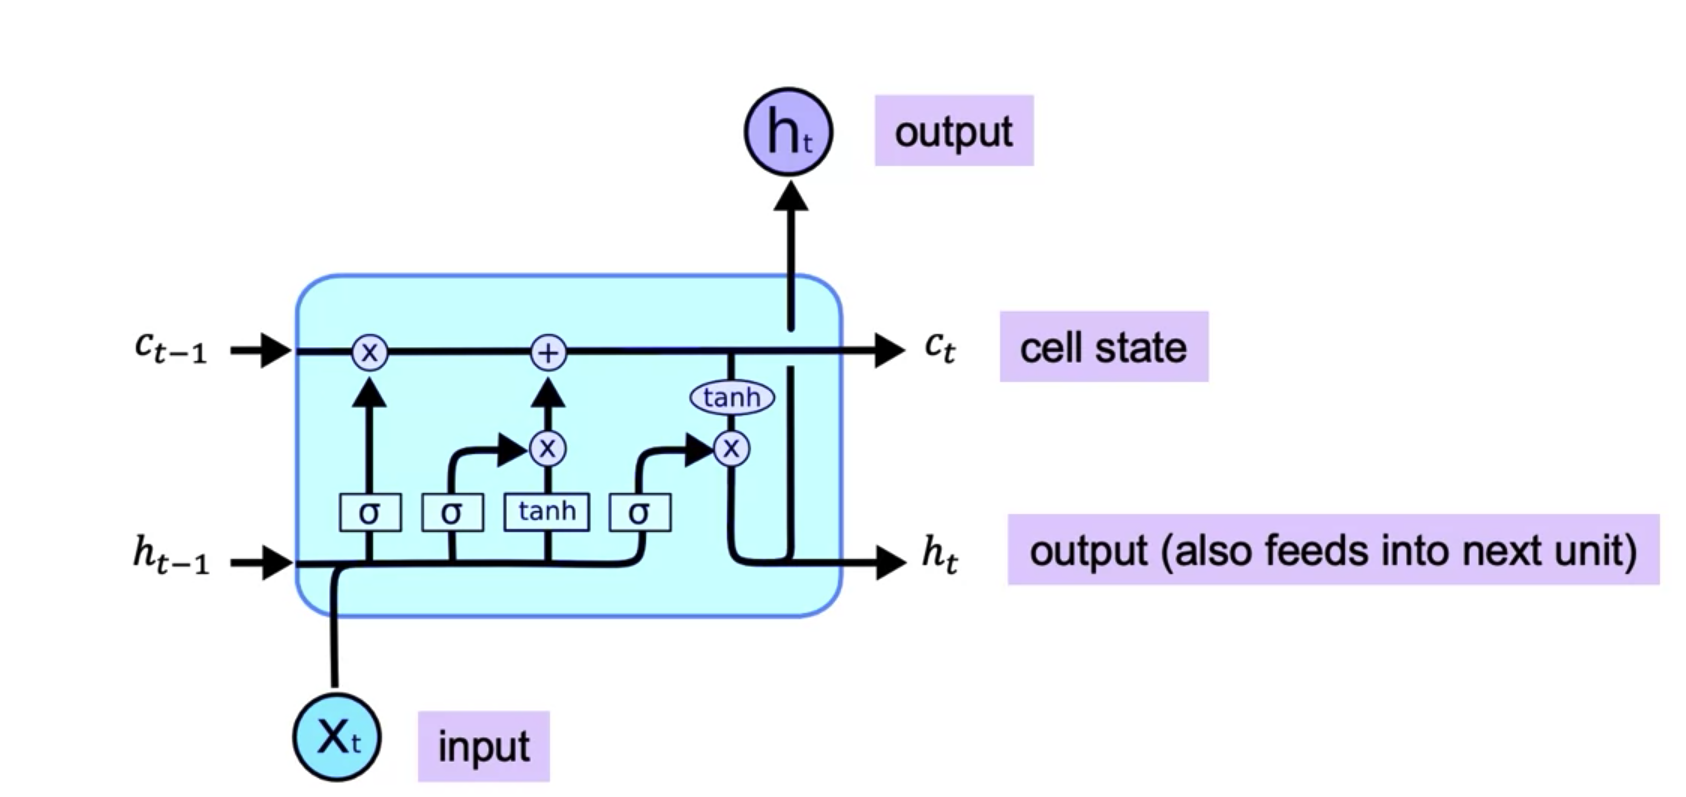
</div>

**Input:** $X_t$ will be a single time-step (or word) from that sequence of time-steps (words)




**Cell State:** $c_t$ will be a new cell state which is new and is not part of our original RNN




**Hidden State:** $h_t$ this will also feed into the next unit along with the cell state



**Output:** $H_t$ which will be the same as the $h_t$ we are passing along to the next cell, and, similar to RNNs, what will ultimately matter will be the final output from the unrolled version where we have all the information from teh sequence

## Cell State Update

Will be done in two stages

### 1. Forget Gate

Whose purpose is to give us an easy mechanism to decide what information from the prior cell state, as well as the current input coming in to forget

### 2. Add New Information

Which tells us what new information is worth maintaining

<div>
    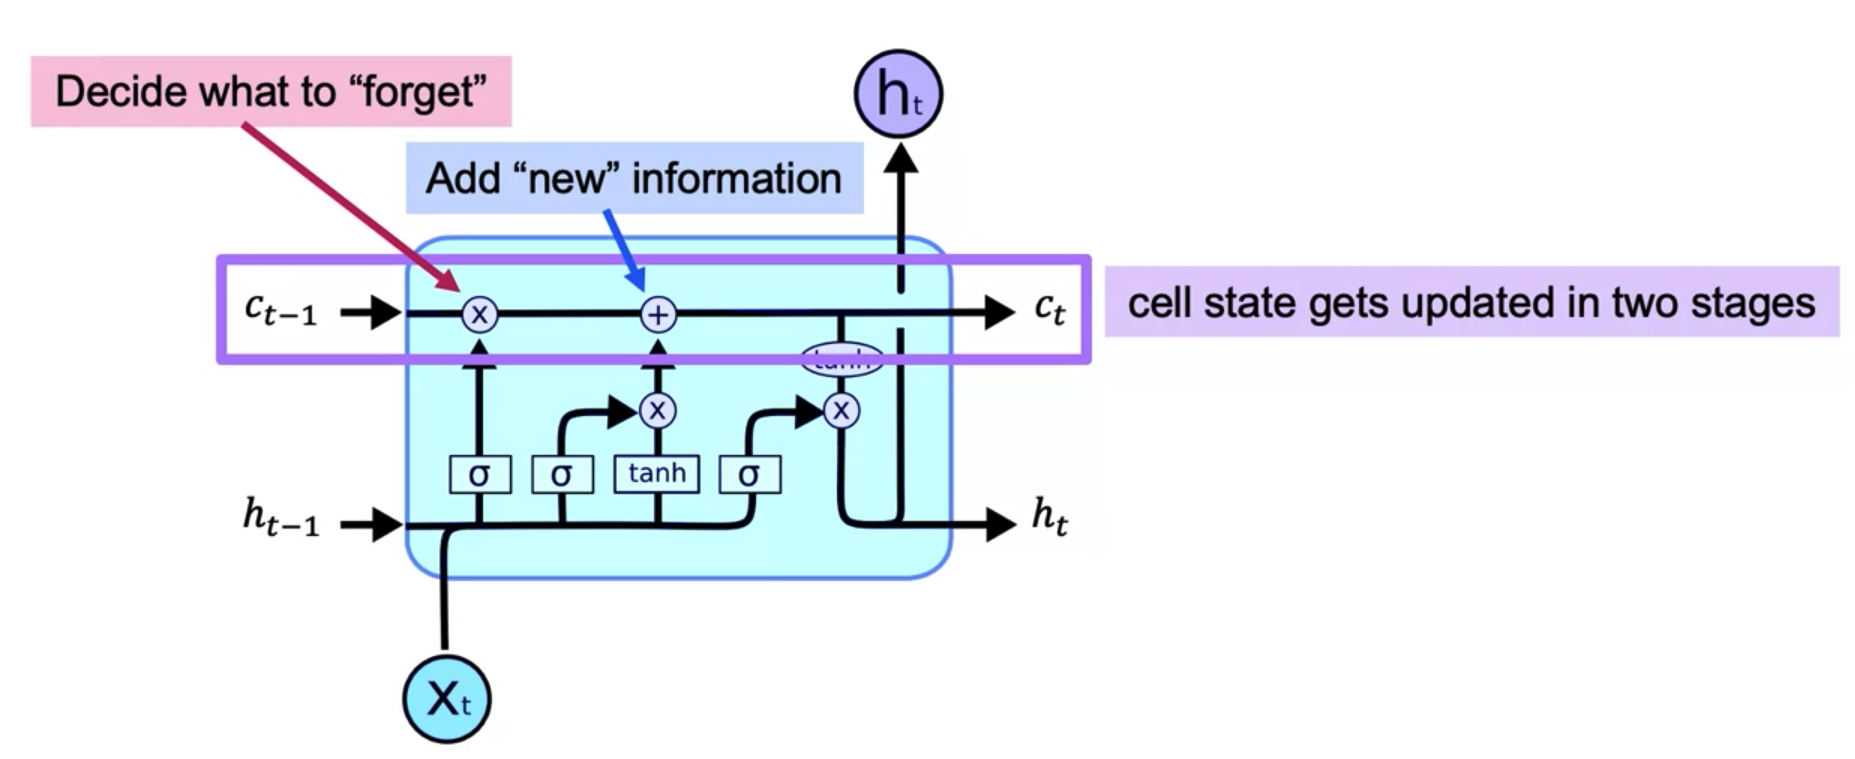
</div>

### 1. Deciding to Forget


Our cell is looking at the information at $h_{t-1}$ (from the prior cell) to help us decide what to forget as well as our new input $X_t$

- Concatenate the two vectors together so we have a single vector


- Pass this single vector to our siglmoid function so the output will have some value between 0 and 1

<div>
    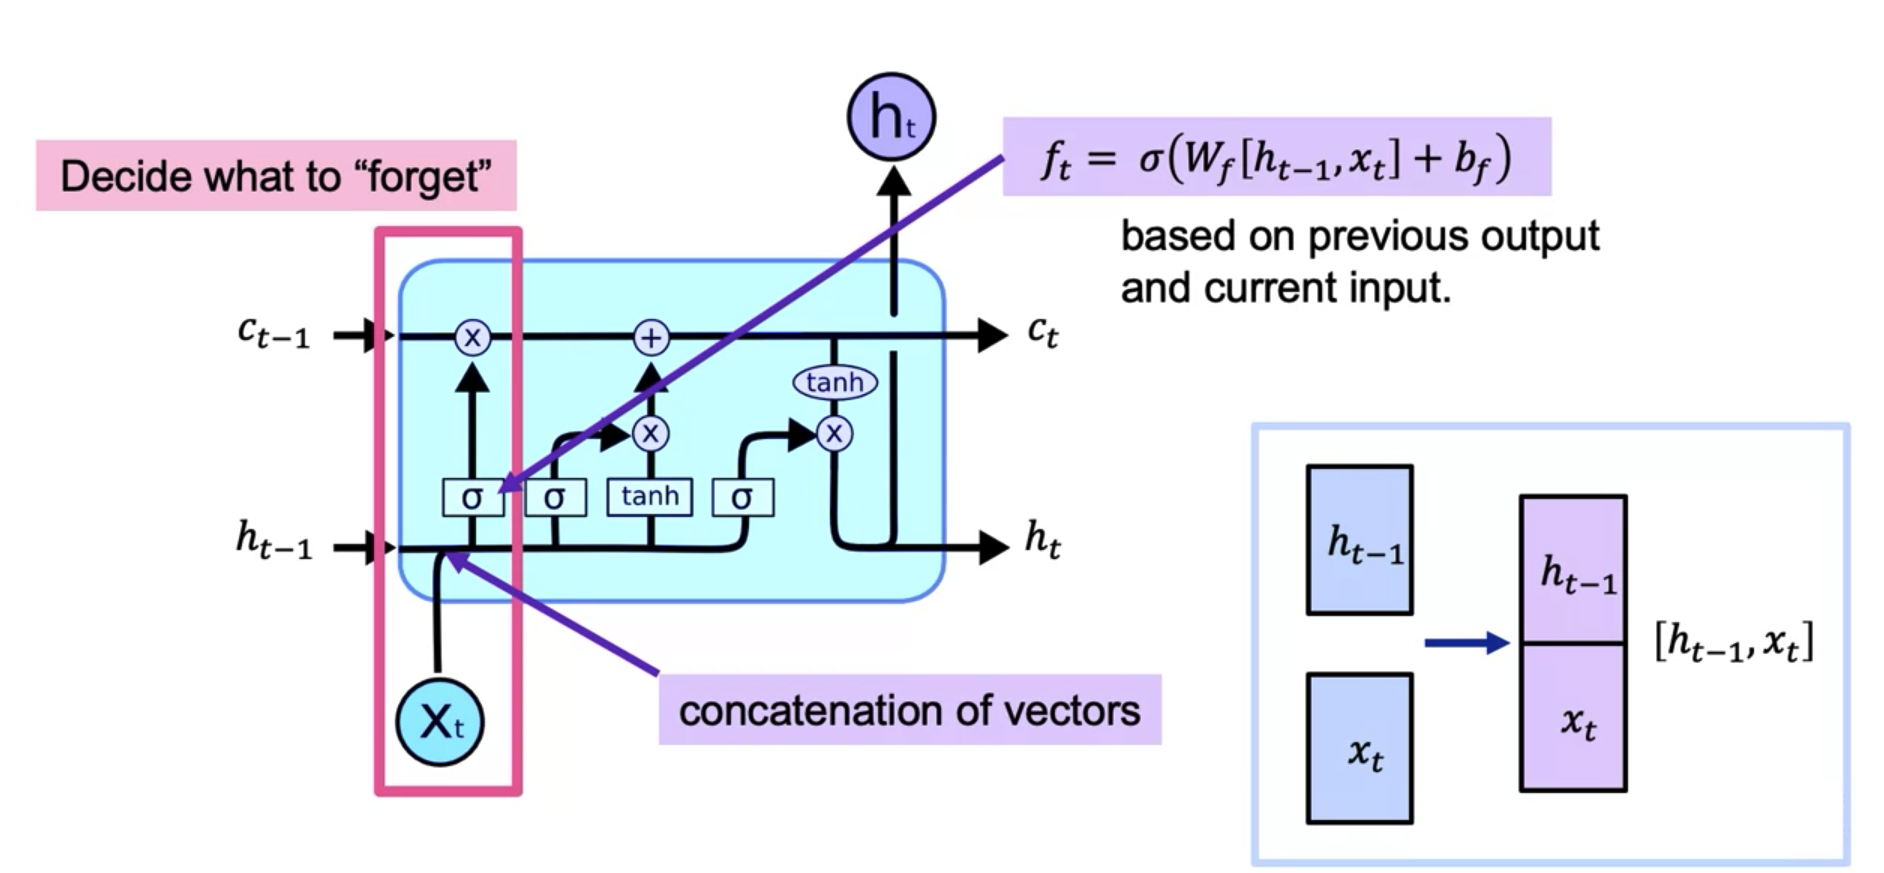
</div>

### 2. Adding in New Information

We are again calculating that same sunction of sigmoid of a weight matrix of the concatenation our input $X_t$ as well as $h_{t-1}$. 

Here we are just learning new weights so we are working with $W_i$ instead of $W_f$ but again outputting some value bewteen 0 and 1 as we pass that through the sigmoid


With that we are also going to compute a **tanh** of another wight matrix, and the concatenations of the weight matrix multiplied by a concatenation of $X_t$ as well as $h_{t-1}$, and we will pass these through a **tanh** activation (having values between -1 and 1)


**Tanh** is the information we are deciding whether to add on and the **sigmoid** between 0 and 1 will tell us what portion of that information we want to add on:

    - close to 1: we want to add on
    
    
    - close to 0: do not want to add on

<div>
    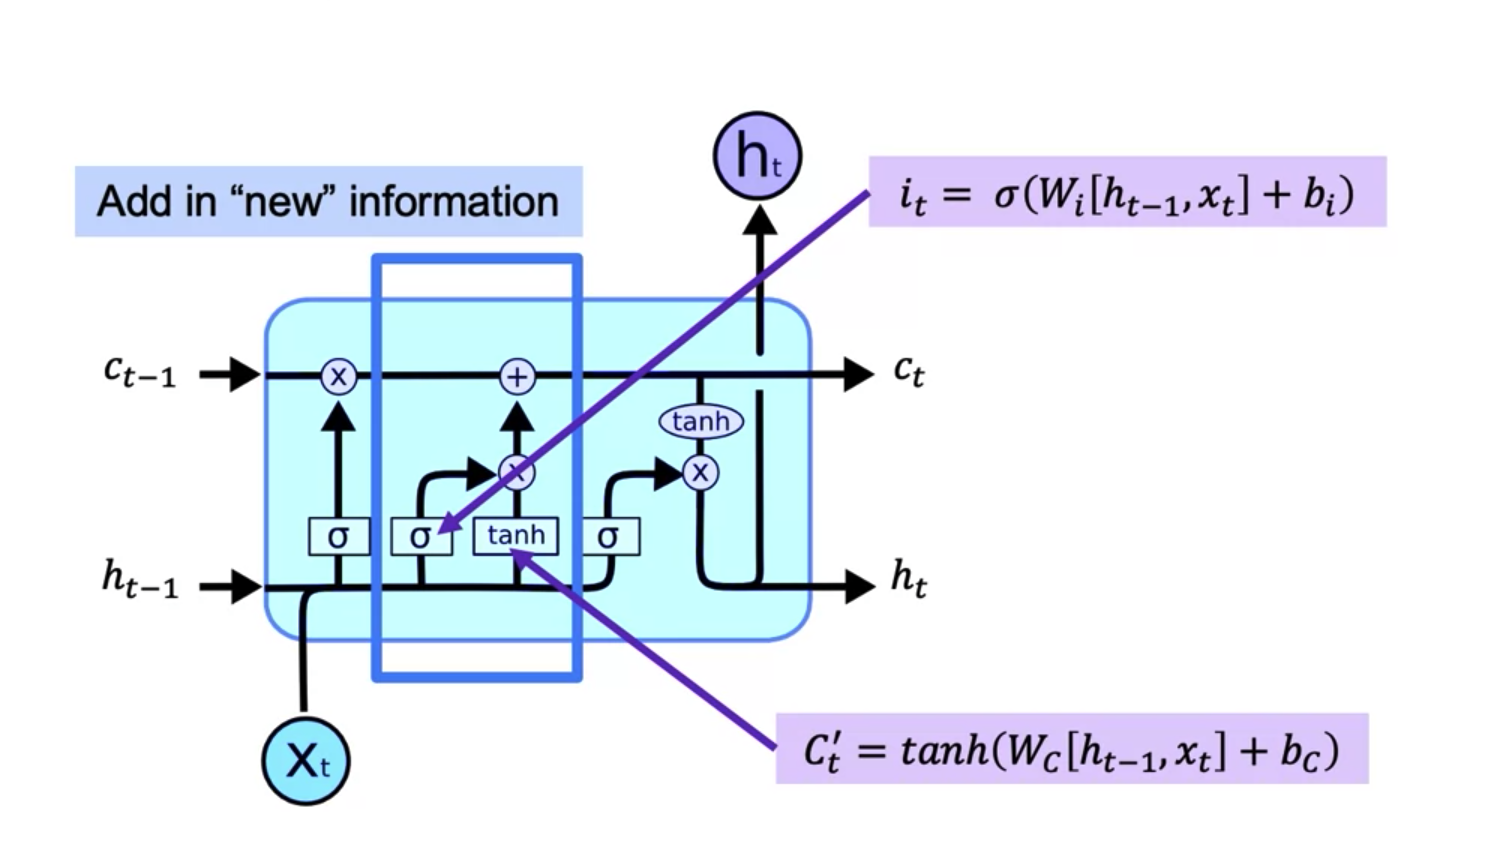
</div>

### Both the Portions

The arrows from both the **forget portion** and the **add new information** portion will both lead up to our **cell state** we are trying to compute.


- The new **cell state** will then be a function of each of these outputs

$$ \text{Forget the Old} = f_i C_{t-i}$$


$$ \text{Add the New} = i_t C'_t $$

where, 

- $f_i$ is the value between 0 and 1 that will tell us how much of the old cell (if we are multiplying it by a value between 0 and 1) should we keep and how much should we forget


- From there we can add on the outpuy of our last calculation of ($\tanh \times \text{sigmoid}$) to decide how much **new information** to add on (represented by the addition)

<div>
    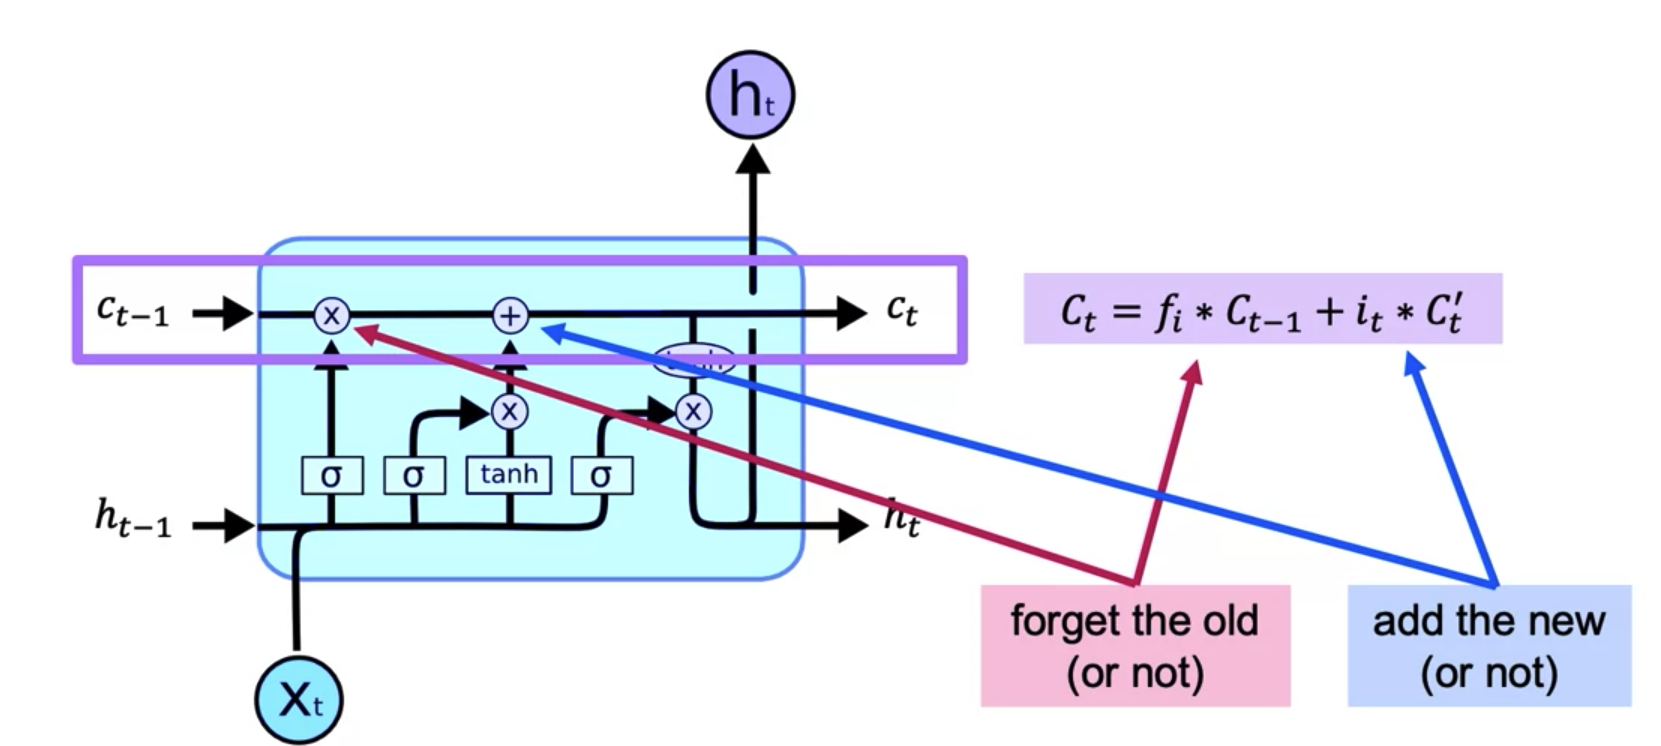
</div>

### Output

$$ o_t = \sigma \Big( W_0 [h_{t-1}, h x_t] + b_0 \Big) $$

<div>
    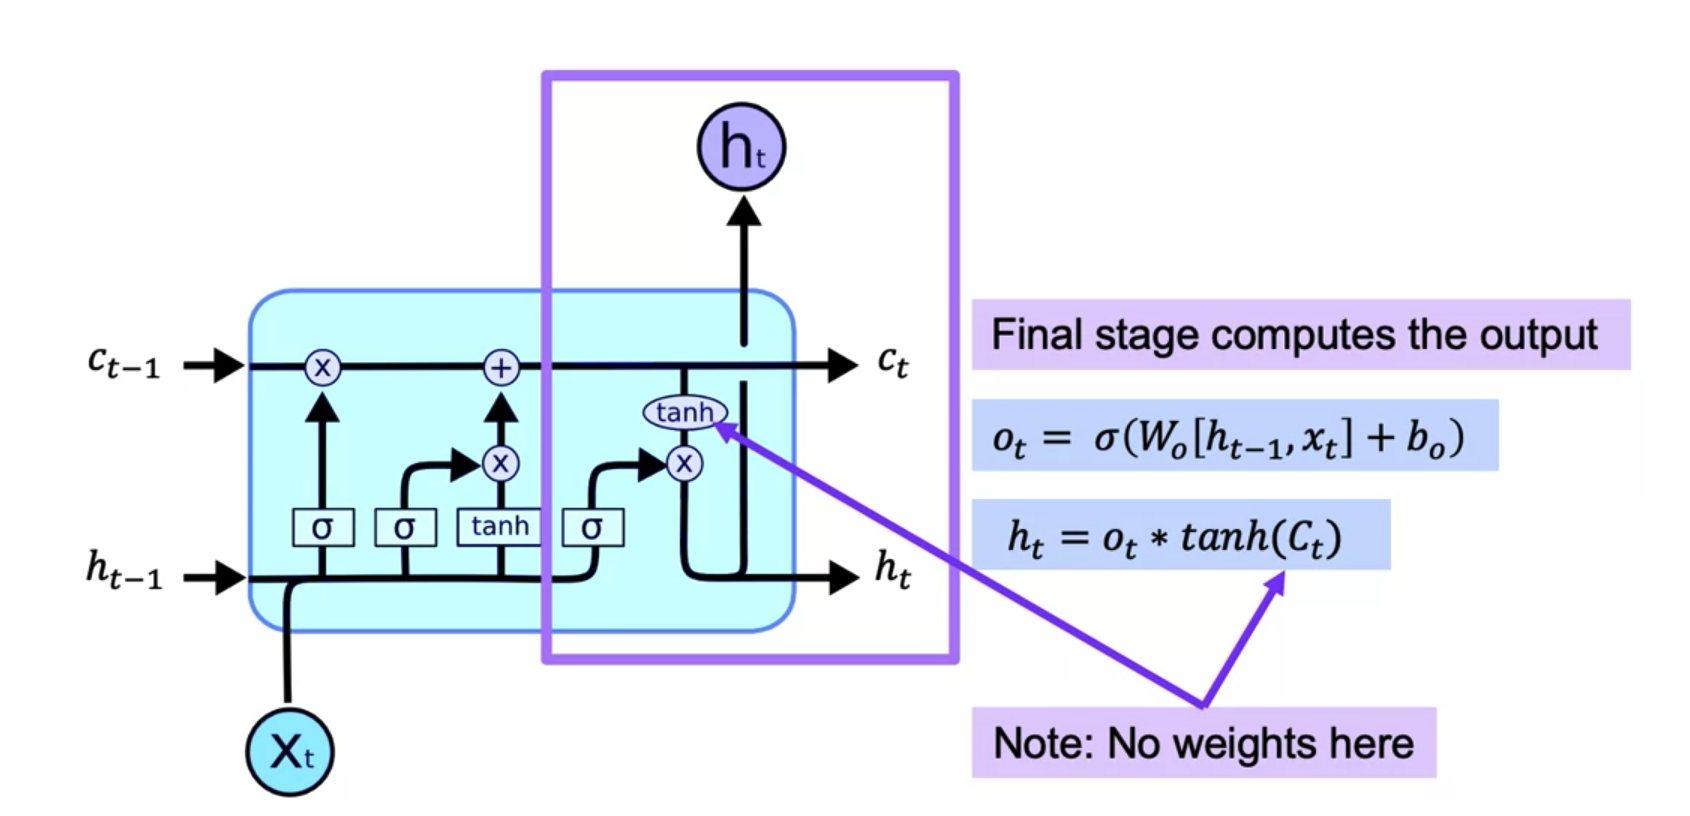
</div>

## Sequence of LSTMs

<div>
    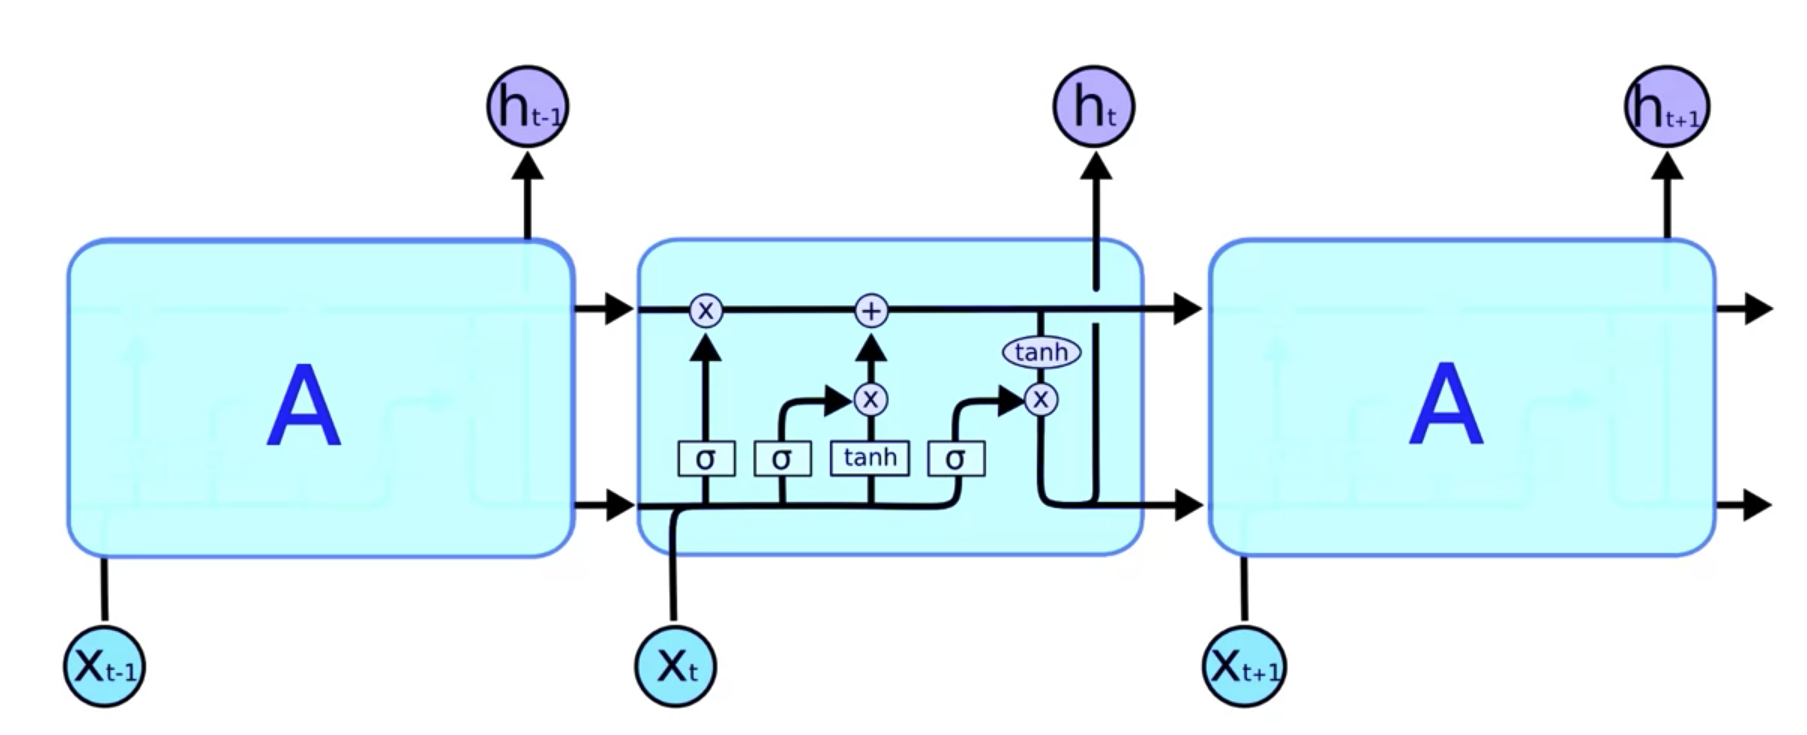
</div>

# 2. Gated Recurrent Units (GRU)

The difference between GRU and LSTM is that **past information is now used to transfer past information** 


- **Lack of a cell state** it is just going to have a past hidden state and that state will allow for persistence as well as understanding what will be updated and what will be forgotten



- **Simpler Version of the LSTM** as it is still going to accomplish the same functionality of having a longer term memory than Vanilla RNNs, it jus will have **less weight** that will hav eto keep in memory throughout

<div>
    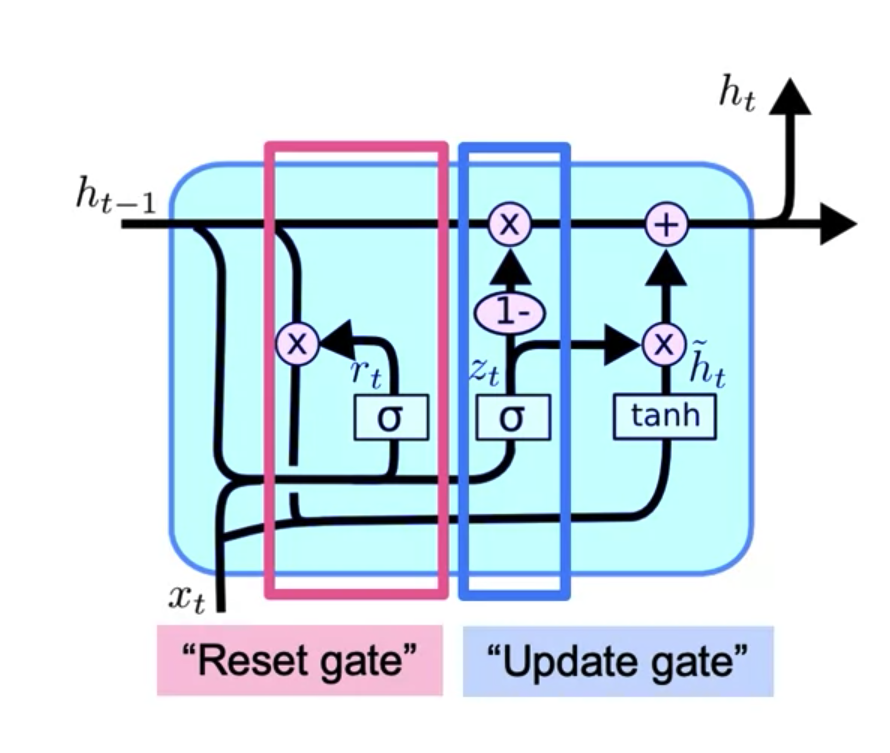
</div>

### a. Reset Gate

Helps decide how much past information to forget


- takes in the past hidden state $h_{t-1}$ as well as $x_t$ and passes that through a sigmoid in order to figure out waht is going to be reset

### b. Update Gate

Helps decide what information to throw away and what new information to keep


- the $z_t$ is a combination of the $h_{t-1}$ and our input $x_t$ that passes through a sigmoid 



- the idea remains the same of having some type of functionality to decide what will we remember and maintain information from the past with another portion of the cell dedicated to updating that information

# 3. Seq2Seq

<div>
    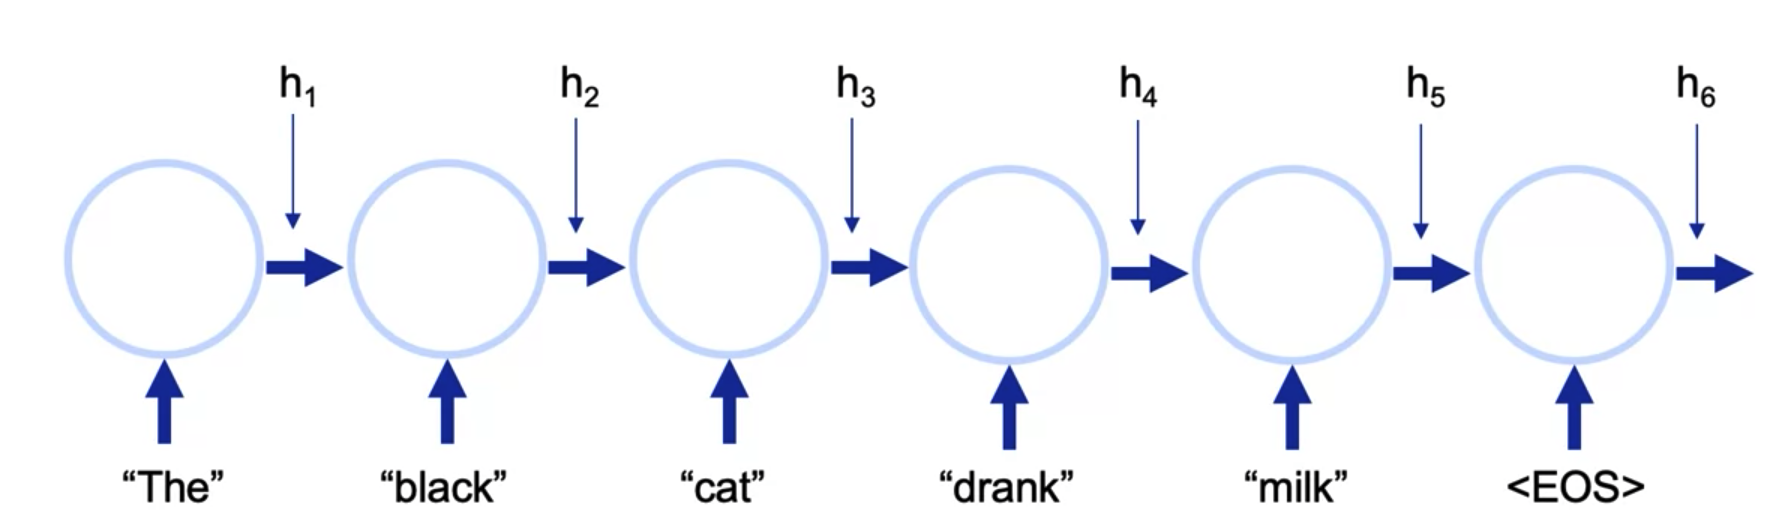
</div>

Sequence to sequence is meant to convert a sequence from one domain (language as in English) to another domain (language as in French) - The last node will have accounted for all the information from all the past information

The final hidden layer state will contain inforamtion for all past words (EOS = End of Sentence)

<div>
    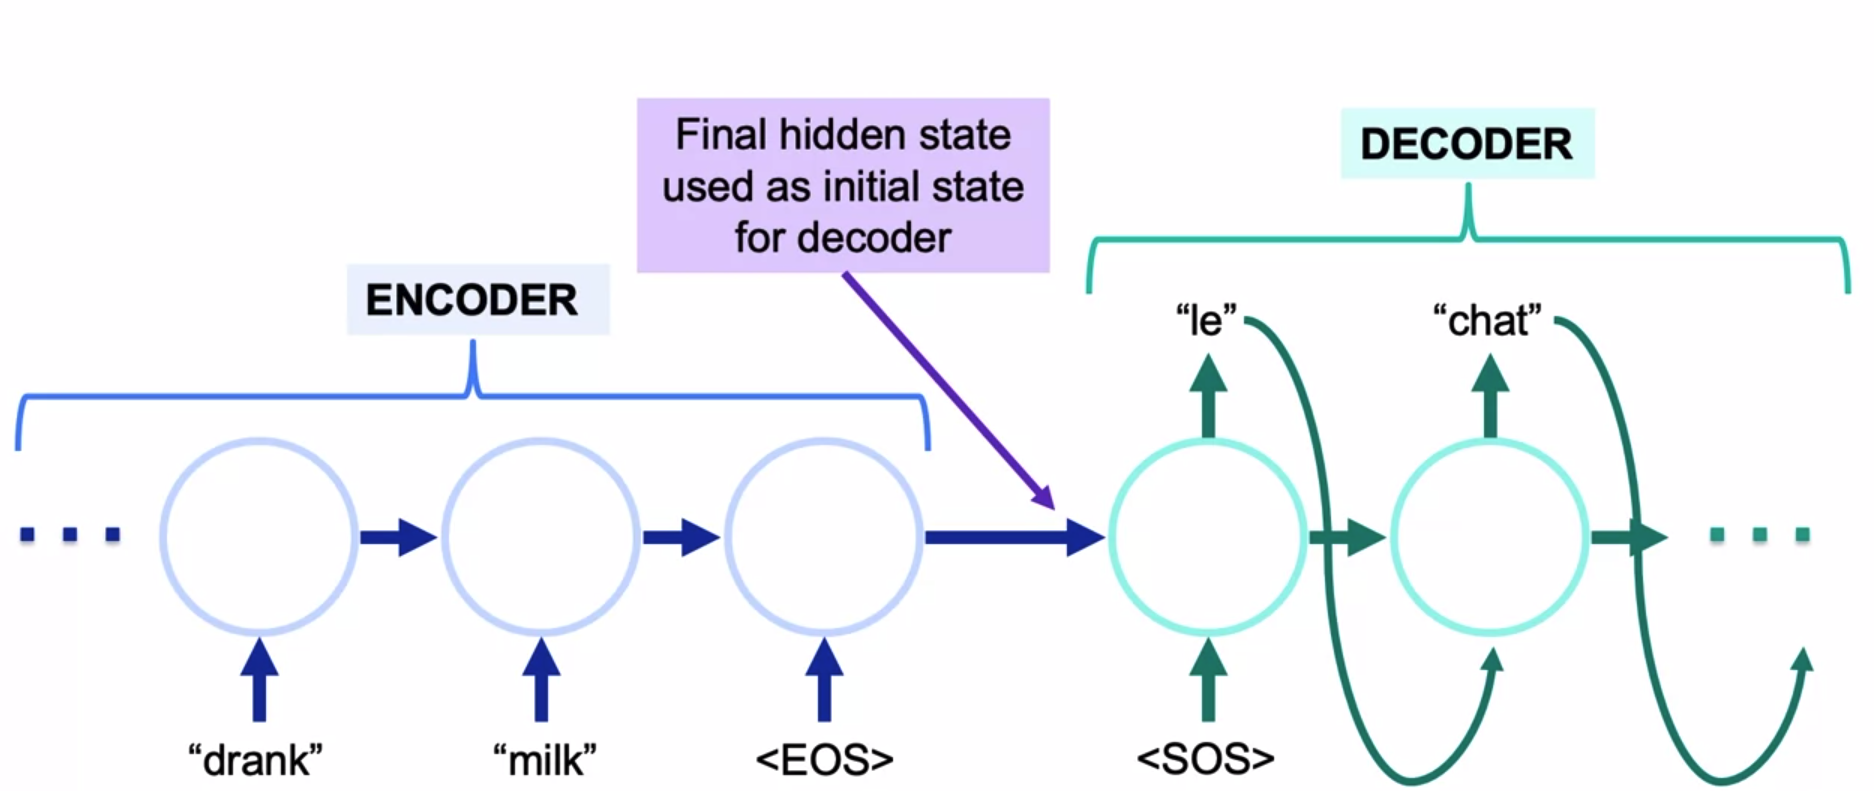
</div>

The Decoder function will use as initial state the encoder and will translate conditional on the initial state

## Greedy Interference

The current model is producing one word at a **time conditional on a prior word**


- if it produces one wrong word, we may end up completely throwing off the sequence of words (entire translation)


## Beam Search

A solution to this is to produce multiple different hypothesis to produce words until the end of sentence and then see which full sentence is more likely

<div>
    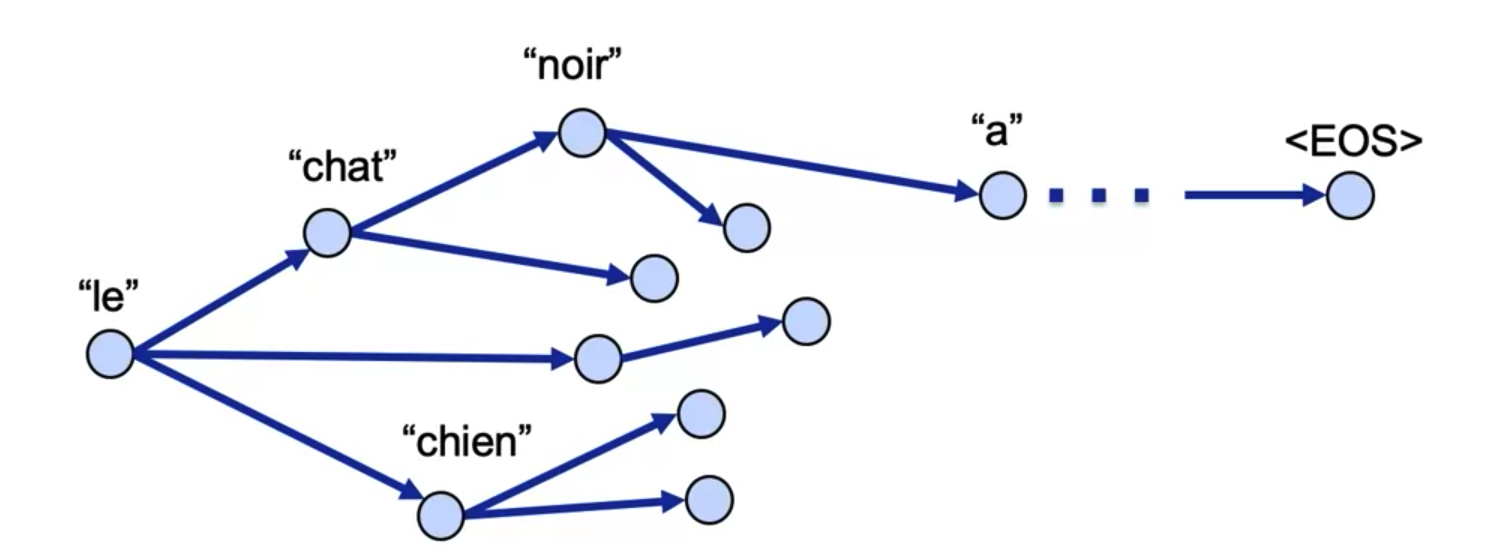
</div>

We can then probabilitically determine which of these sentences is most likely

We can look to see how close the vector in one language is tothe word in our decoder

<div>
    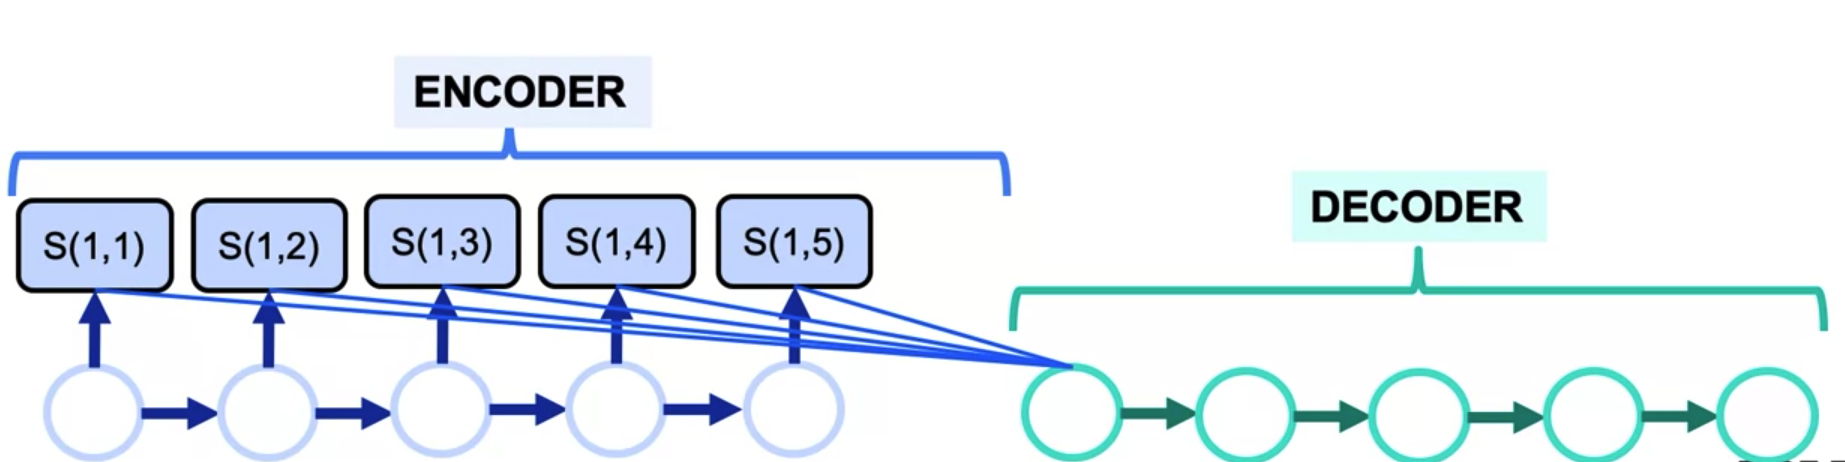
</div>

Have a similarity function $s(i,j)$ that will weight the different embedding lauer hidden states to give us a better embedding for the prediction of the next word

This will better allow us to translate between languages when the ordering of the words may be different